Crime and Weather: Boston

In [148]:
import math
import csv
import statistics 
import argparse
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import matplotlib.pyplot as plt

Create Dataframes from Data Files

In [149]:
crimeDF = pd.read_csv("bcrime.csv", encoding='windows-1254')
weatherDF = pd.read_csv("bweather.csv")

numofcrimes = len(crimeDF.index)
print("Total Crimes:", numofcrimes)

numofweather = len(weatherDF.index)
print("Weather Entries:", numofweather)

Total Crimes: 327820
Weather Entries: 3749


c:\Users\Brady Murphy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Remove Unwanted Data and Display Working Dataframe

In [150]:
del crimeDF["INCIDENT_NUMBER"]
del crimeDF["UCR_PART"]
del crimeDF["OFFENSE_CODE"]
del crimeDF["DISTRICT"]
del crimeDF["REPORTING_AREA"]
del crimeDF["SHOOTING"]
del crimeDF["DAY_OF_WEEK"]
del crimeDF["HOUR"]
del crimeDF["Lat"]
del crimeDF["Long"]

In [151]:
crimeDF.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,YEAR,MONTH,STREET,Location
0,Disorderly Conduct,DISTURBING THE PEACE,2018-10-03 20:13:00,2018,10,ARLINGTON ST,"(42.26260773, -71.12118637)"
1,Property Lost,PROPERTY - LOST,2018-08-30 20:00:00,2018,8,ALLSTON ST,"(42.35211146, -71.13531147)"
2,Other,THREATS TO DO BODILY HARM,2018-10-03 19:20:00,2018,10,DEVON ST,"(42.30812619, -71.07692974)"
3,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,2018-10-03 20:00:00,2018,10,CAMBRIDGE ST,"(42.35945371, -71.05964817)"
4,Aircraft,AIRCRAFT INCIDENTS,2018-10-03 20:49:00,2018,10,PRESCOTT ST,"(42.37525782, -71.02466343)"


In [152]:
del weatherDF["High Dew Point (F)"]
del weatherDF["Low Dew Point (F)"]
del weatherDF["Avg Dew Point (F)"]
del weatherDF["High Humidity (%)"]
del weatherDF["Low Sea Level Press (in)"]
del weatherDF["High Visibility (mi)"]
del weatherDF["Avg Visibility (mi)"]
del weatherDF["Low Visibility (mi)"]
del weatherDF["Snowfall (in)"]
del weatherDF["Precip (in)"]
del weatherDF["Low Humidity (%)"]
del weatherDF["Avg Humidity (%)"]
del weatherDF["Avg Sea Level Press (in)"]
del weatherDF["High Sea Level Press (in)"]

In [153]:
weatherDF.head()

,Year,Month,Day,High Temp (F),Avg Temp (F),Low Temp (F),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Events
0,2008,1,1,40,34,28,23,10,36,Both
1,2008,1,2,33,22,10,28,15,38,Snow
2,2008,1,3,14,11,7,25,17,32,None
3,2008,1,4,32,20,8,23,12,28,None
4,2008,1,5,42,35,27,16,9,23,None


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Crime Occurrences per Month

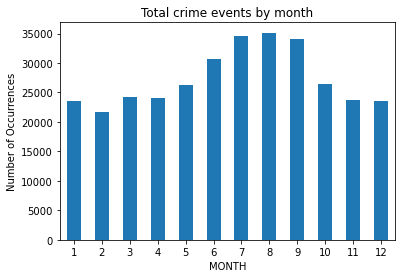

In [154]:
ax = crimeDF.groupby("MONTH").size().plot(kind = "bar", title= "Total crime events by month")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

Crime Occurences per Year

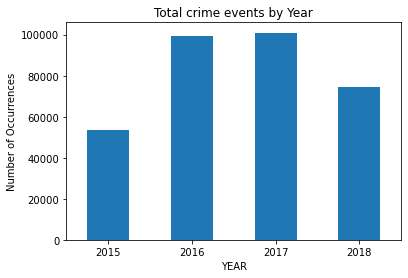

In [155]:
ax = crimeDF.groupby("YEAR").size().plot(kind = "bar", title= "Total crime events by Year")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Crime Types and Classification (work in progress)

Motor Vehicle Accident Response              38134
Larceny                                      26670
Medical Assistance                           24226
Investigate Person                           19176
Other                                        18612
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Burglary - No Property Taken                     2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Biological Threat                                2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64


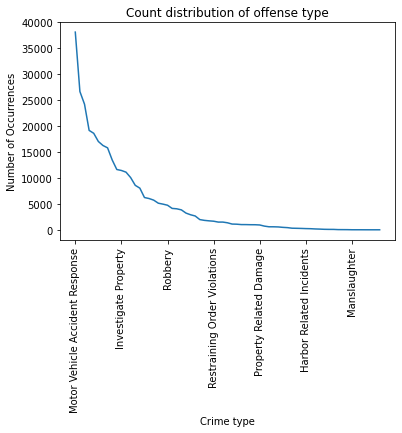

In [156]:
offenseType =(crimeDF["OFFENSE_CODE_GROUP"].value_counts())
print(offenseType)
crimeDF.shape
ax = offenseType.plot(title="Count distribution of offense type")
ax.set_xlabel("Crime type")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=90)
plt.show()

Crime Occurances by Type (working on classification of "Type")

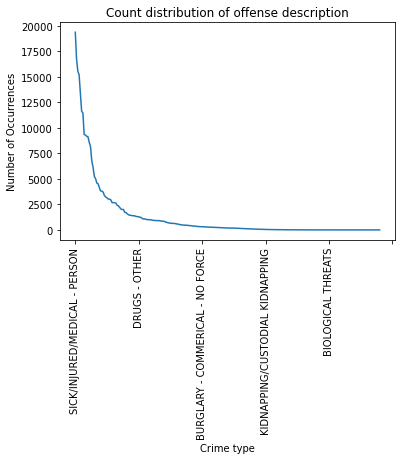

In [157]:
res = crimeDF[~crimeDF['OFFENSE_DESCRIPTION'].isin(offenseType[offenseType < 1000].index)]

# print(res)
ax = (res["OFFENSE_DESCRIPTION"].value_counts()).plot(title="Count distribution of offense description")
ax.set_xlabel("Crime type")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=90)
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Crimes Against Property (OFFENSE_DESCRIPTION COLUMN)

In [158]:
theft = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("theft", case=False)]
numoftheft = len(theft.index)
print("Theft Crimes:", numoftheft)

vandalism = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("vandalism", case=False)]
numofvandalism = len(vandalism.index)
print("Vadalism Crimes:", numofvandalism)

larceny = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("larceny", case=False)]
numoflarceny = len(larceny.index)
print("Larceny Crimes:", numoflarceny)

burglary = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("burglary", case=False)]
numofburglary = len(burglary.index)
print("Burglary Crimes:", numofburglary)

property = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("property", case=False)]
numofproperty = len(property.index)
print("Property Crimes:", numofproperty)

numcrimeprop = numofburglary + numoflarceny + numoftheft + numofproperty + numofvandalism
print("Crimes Against Property:", numcrimeprop)

proppercent = (numcrimeprop/numofcrimes)
print("Percent of Crimes:", proppercent*100)

Theft Crimes: 27740
Vadalism Crimes: 15542
Larceny Crimes: 37790
Burglary Crimes: 7542
Property Crimes: 51506
Crimes Against Property: 140120
Percent of Crimes: 42.74296870233665


Crimes Against People (OFFENSE_DESCRIPTION COLUMN)

In [159]:
assault = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("assault", case=False)]
numofassault = len(assault.index)
print("Assault Crimes:", numofassault)

manslaught = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("manslaughter", case=False)]
numofmanslaught = len(manslaught.index)
print("Manslaughter Crimes:", numofmanslaught)

warrant = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("warrant", case=False)]
numofwarrant = len(warrant.index)
print("Warrants:", numofwarrant)

medical = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("medical", case=False)]
numofmedical = len(medical.index)
print("Medical:", numofmedical)

person = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("person", case=False)]
numofperson = len(person.index)
print("Person Crimes:", numofperson)

harassment = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("harassment", case=False)]
numofharass = len(harassment.index)
print("Harassment Crimes:", numofharass)

numcrimeperson = numofassault + numofmanslaught + numofwarrant + numofmedical + numofperson + numofharass
print("Crimes Against People:", numcrimeperson)

peoplepercent = (numcrimeperson/numofcrimes)
print("Percent of Crimes:", peoplepercent*100)

Assault Crimes: 24476
Manslaughter Crimes: 173
Warrants: 9560
Medical: 20798
Person Crimes: 55145
Harassment Crimes: 4263
Crimes Against People: 114415
Percent of Crimes: 34.901775364529314


Crimes Against Society (OFFENSE_DESCRIPTION COLUMN)

In [160]:
Violations = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("violation", case=False)]
numofvio = len(Violations.index)
print("Violations:", numofvio)

threat = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("threat", case=False)]
numofthreat = len(threat.index)
print("Threats:", numofthreat)

other = crimeDF.loc[crimeDF['OFFENSE_DESCRIPTION'].str.contains("other", case=False)]
numofother = len(other.index)
print("Other:", numofother)

numcrimesociety = numofvio + numofthreat + numofother
print("Crimes Against Society/Other:", numcrimesociety)

societypercent = (numcrimesociety/numofcrimes)
print("Percent of Crimes:", societypercent*100)

Violations: 5996
Threats: 9425
Other: 20893
Crimes Against Society/Other: 36314
Percent of Crimes: 11.077420535659813


Missing Crimes (OFFENSE_DESCRIPTION COLUMN)

In [161]:
numofmissing = numofcrimes - (numcrimeprop + numcrimeperson + numcrimesociety)
print("Number Missing:", numofmissing)

missingpercent = (numofmissing/numofcrimes)
print("Percent of Crimes:", missingpercent*100)

Number Missing: 36971
Percent of Crimes: 11.277835397474224


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Crimes Against Property (OFFENSE_CODE_GROUP COLUMN)

In [162]:
theft1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("theft", case=False)]
numoftheft1 = len(theft1.index)
print("Theft Crimes:", numoftheft1)

vandalism1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("vandalism", case=False)]
numofvandalism1 = len(vandalism1.index)
print("Vadalism Crimes:", numofvandalism1)

larceny1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("larceny", case=False)]
numoflarceny1 = len(larceny1.index)
print("Larceny Crimes:", numoflarceny1)

burglary1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("burglary", case=False)]
numofburglary1 = len(burglary1.index)
print("Burglary Crimes:", numofburglary1)

property1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("property", case=False)]
numofproperty1 = len(property1.index)
print("Property Crimes:", numofproperty1)

numcrimeprop1 = numofburglary1 + numoflarceny1 + numoftheft1 + numofproperty1 + numofvandalism1
print("Crimes Against Property:", numcrimeprop1)

proppercent1 = (numcrimeprop1/numofcrimes)
print("Percent of Crimes:", proppercent1*100)

Theft Crimes: 6036
Vadalism Crimes: 15810
Larceny Crimes: 37790
Burglary Crimes: 7551
Property Crimes: 27993
Crimes Against Property: 95180
Percent of Crimes: 29.034226099688855


Crimes Against People (OFFENSE_CODE_GROUP COLUMN)

In [170]:
assault1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("assault", case=False)]
numofassault1 = len(assault1.index)
print("Assault Crimes:", numofassault1)

manslaught1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("manslaughter", case=False)]
numofmanslaught1 = len(manslaught1.index)
print("Manslaughter Crimes:", numofmanslaught1)

warrant1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("warrant", case=False)]
numofwarrant1 = len(warrant1.index)
print("Warrants:", numofwarrant1)

medical1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("medical", case=False)]
numofmedical1 = len(medical1.index)
print("Medical:", numofmedical1)

person1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("person", case=False)]
numofperson1 = len(person1.index)
print("Person Crimes:", numofperson1)

harassment1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("harassment", case=False)]
numofharass1 = len(harassment1.index)
print("Harassment Crimes:", numofharass1)

numcrimeperson1 = numofassault1 + numofmanslaught1 + numofwarrant1 + numofmedical1 + numofperson1 + numofharass1
print("Crimes Against People:", numcrimeperson1)

peoplepercent1 = (numcrimeperson1/numofcrimes)
print("Percent of Crimes:", peoplepercent1*100)

Assault Crimes: 24296
Manslaughter Crimes: 9
Warrants: 9560
Medical: 24226
Person Crimes: 28160
Harassment Crimes: 4263
Crimes Against People: 90514
Percent of Crimes: 27.610884021719233


Crimes Against Society (OFFENSE_CODE_GROUP COLUMN)

In [169]:
Violations1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("violation", case=False)]
numofvio1 = len(Violations1.index)
print("Violations:", numofvio1)

threat1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("threat", case=False)]
numofthreat1 = len(threat1.index)
print("Threats:", numofthreat1)

other1 = crimeDF.loc[crimeDF['OFFENSE_CODE_GROUP'].str.contains("other", case=False)]
numofother1 = len(other1.index)
print("Other:", numofother1)

numcrimesociety1 = numofvio1 + numofthreat1 + numofother1
print("Crimes Against Society/Other:", numcrimesociety1)

societypercent1 = (numcrimesociety1/numofcrimes)
print("Percent of Crimes:", societypercent1*100)

Violations: 30553
Threats: 2
Other: 19085
Crimes Against Society/Other: 49640
Percent of Crimes: 15.142456225977671


In [165]:
numofmissing1 = numofcrimes - (numcrimeprop1 + numcrimeperson1 + numcrimesociety1)
print("Number Missing:", numofmissing1)

missingpercent1 = (numofmissing1/numofcrimes)
print("Percent of Crimes:", missingpercent1*100)

Number Missing: 92486
Percent of Crimes: 28.212433652614237


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Temperature Through the Months

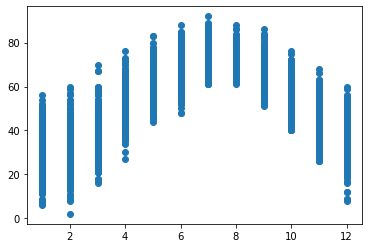

In [166]:
plt.scatter(weatherDF["Month"], weatherDF["Avg Temp (F)"])
plt.show()

Temperature Through the Years

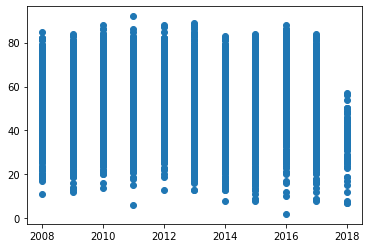

In [167]:
plt.scatter(weatherDF["Year"], weatherDF["Avg Temp (F)"])
plt.show()

Temperature Spread for Weather Events

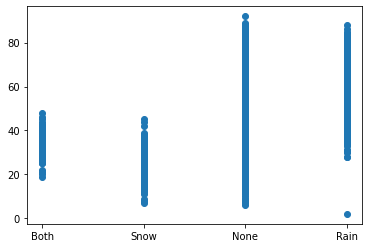

In [168]:
plt.scatter(weatherDF["Events"], weatherDF["Avg Temp (F)"])
plt.show()